# Koil: A Tool to Design the Winding of Rotating Electric Machinery
creating a symmetrical and balanced winding

<img src="figure/koil_01.jpg" width="300" align="left"/>



In [1]:
from dolomites import koil
import math

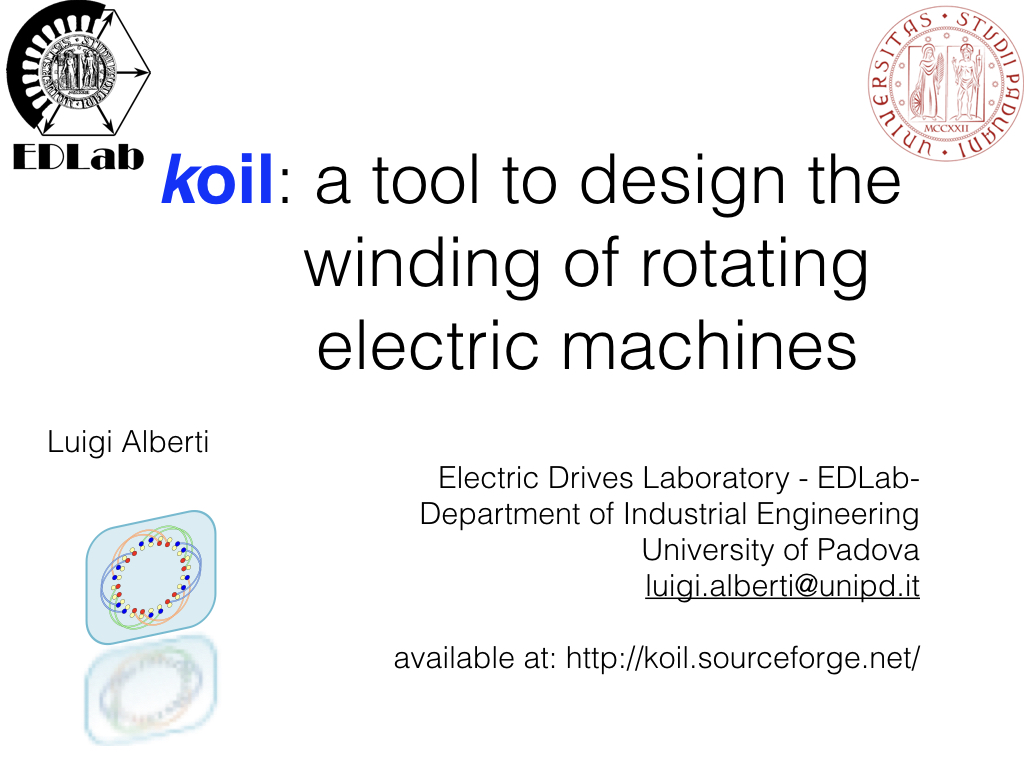

interactive(children=(IntSlider(value=1, description='x', max=14, min=1), Output()), _dom_classes=('widget-int…

In [2]:
import ipywidgets as wg
from IPython.display import Image

def f(x):
      return Image(filename='./figure/koil'+str(x)+'.jpeg')

wg.interact(f, x=wg.IntSlider(min=1,max=14,step=1));

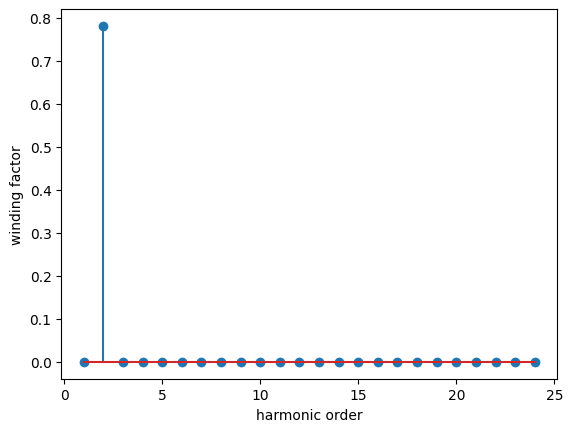

In [3]:
# Example of sinusoidal winding

Q = 36
p = 2
wa = koil.winding(Q,p)
wb = koil.winding(Q,p)
wc = koil.winding(Q,p)
    
for x in range(0, 18):
    angle = math.pi/Q + 2.0*math.pi/Q*x
    na = 1*math.sin(angle*p)
    nb = 1000*math.sin(angle-2./3*math.pi)
    nc = 1000*math.sin(angle-4./3*math.pi)
    wa.add_coil(koil.coil(x+1,Q-x,na))
    wb.add_coil(koil.coil(x+1,Q-x,nb))
    wc.add_coil(koil.coil(x+1,Q-x,nc))
    
nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(wa.get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

In [6]:
kw

[0,
 0.7814167995011865,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
sum(abs(wa.get_slot_matrix()))

23.035081932574542

In [8]:
w = koil.m_phase_winding()
m = 3
Q = 36
p = 2

w.compute_winding(m,Q,p,single_layer=False)

 ## Get the winding of each phase

In [9]:
for _w in w.windings:
    print(_w.coils)
#help(koil.Coil)

[coil (4, 13, 1), coil (5, 14, 1), coil (6, 15, 1), coil (22, 31, 1), coil (23, 32, 1), coil (24, 33, 1), coil (13, 22, -1), coil (14, 23, -1), coil (15, 24, -1), coil (31, 4, -1), coil (32, 5, -1), coil (33, 6, -1)]
[coil (10, 19, 1), coil (11, 20, 1), coil (12, 21, 1), coil (28, 1, 1), coil (29, 2, 1), coil (30, 3, 1), coil (1, 10, -1), coil (2, 11, -1), coil (3, 12, -1), coil (19, 28, -1), coil (20, 29, -1), coil (21, 30, -1)]
[coil (16, 25, 1), coil (17, 26, 1), coil (18, 27, 1), coil (34, 7, 1), coil (35, 8, 1), coil (36, 9, 1), coil (7, 16, -1), coil (8, 17, -1), coil (9, 18, -1), coil (25, 34, -1), coil (26, 35, -1), coil (27, 36, -1)]


## Get the winding factors

In [10]:
for _w in w.windings:
    print(_w.get_kw())

0.9597950805239389
0.9597950805239389
0.9597950805239388


In [11]:
for nu in range(1,12):
    print(nu,w.windings[0].get_kw(nu))

1 0
2 0.9597950805239389
3 0
4 0
5 0
6 0.6666666666666669
7 0
8 0
9 0
10 0.21756788155538043
11 0


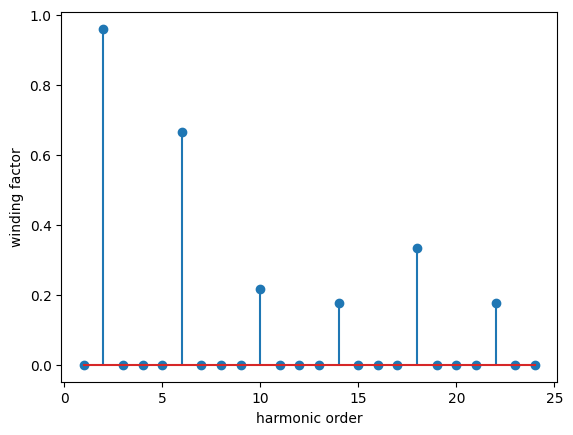

In [12]:
nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(w.windings[0].get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

## Get the slot matrix

In [13]:
for _w in w.windings:
    print(_w.get_slot_matrix())


[ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.]
[-1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.
 -1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  1.]


In [14]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('lua',name=str(i+1)))

k1 = {0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0}
k2 = {-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0}
k3 = {0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0}


In [14]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp',name=chr(ord('a')+i)))

ka[#1001] = 1.0;
ka[#1002] = 1.0;
ka[#1003] = 0.0;
ka[#1004] = 0.0;
ka[#1005] = 0.0;
ka[#1006] = 0.0;
ka[#1007] = 0.0;
ka[#1008] = 0.0;
ka[#1009] = -1.0;
ka[#1010] = -1.0;
ka[#1011] = -1.0;
ka[#1012] = 0.0;
ka[#1013] = 0.0;
ka[#1014] = 0.0;
ka[#1015] = 0.0;
ka[#1016] = 0.0;
ka[#1017] = 0.0;
ka[#1018] = 1.0;
ka[#1019] = 1.0;
ka[#1020] = 1.0;
ka[#1021] = 0.0;
ka[#1022] = 0.0;
ka[#1023] = 0.0;
ka[#1024] = 0.0;
ka[#1025] = 0.0;
ka[#1026] = 0.0;
ka[#1027] = -1.0;
ka[#1028] = -1.0;
ka[#1029] = -1.0;
ka[#1030] = 0.0;
ka[#1031] = 0.0;
ka[#1032] = 0.0;
ka[#1033] = 0.0;
ka[#1034] = 0.0;
ka[#1035] = 0.0;
ka[#1036] = 1.0;

kb[#1001] = 0.0;
kb[#1002] = 0.0;
kb[#1003] = 0.0;
kb[#1004] = 0.0;
kb[#1005] = 0.0;
kb[#1006] = 1.0;
kb[#1007] = 1.0;
kb[#1008] = 1.0;
kb[#1009] = 0.0;
kb[#1010] = 0.0;
kb[#1011] = 0.0;
kb[#1012] = 0.0;
kb[#1013] = 0.0;
kb[#1014] = 0.0;
kb[#1015] = -1.0;
kb[#1016] = -1.0;
kb[#1017] = -1.0;
kb[#1018] = 0.0;
kb[#1019] = 0.0;
kb[#1020] = 0.0;
kb[#1021] = 0.0;
kb[#1022] = 0.0;
kb[#

In [13]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp-2l',name=str(i+1)))

k1[#1001] = 0.5; k1[#2001] = 0.5;
k1[#1002] = 0.5; k1[#2002] = 0.5;
k1[#1003] = 0.0; k1[#2003] = 0.0;
k1[#1004] = 0.0; k1[#2004] = 0.0;
k1[#1005] = 0.0; k1[#2005] = 0.0;
k1[#1006] = 0.0; k1[#2006] = 0.0;
k1[#1007] = 0.0; k1[#2007] = 0.0;
k1[#1008] = 0.0; k1[#2008] = 0.0;
k1[#1009] = -0.5; k1[#2009] = -0.5;
k1[#1010] = -0.5; k1[#2010] = -0.5;
k1[#1011] = -0.5; k1[#2011] = -0.5;
k1[#1012] = 0.0; k1[#2012] = 0.0;
k1[#1013] = 0.0; k1[#2013] = 0.0;
k1[#1014] = 0.0; k1[#2014] = 0.0;
k1[#1015] = 0.0; k1[#2015] = 0.0;
k1[#1016] = 0.0; k1[#2016] = 0.0;
k1[#1017] = 0.0; k1[#2017] = 0.0;
k1[#1018] = 0.5; k1[#2018] = 0.5;
k1[#1019] = 0.5; k1[#2019] = 0.5;
k1[#1020] = 0.5; k1[#2020] = 0.5;
k1[#1021] = 0.0; k1[#2021] = 0.0;
k1[#1022] = 0.0; k1[#2022] = 0.0;
k1[#1023] = 0.0; k1[#2023] = 0.0;
k1[#1024] = 0.0; k1[#2024] = 0.0;
k1[#1025] = 0.0; k1[#2025] = 0.0;
k1[#1026] = 0.0; k1[#2026] = 0.0;
k1[#1027] = -0.5; k1[#2027] = -0.5;
k1[#1028] = -0.5; k1[#2028] = -0.5;
k1[#1029] = -0.5; k1[#2029] = -0.5;
k1

In [14]:
for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('m-file',name=str(i+1)))

k1 = [1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0];
k2 = [0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0];
k3 = [0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0];


## get the GetDP circuits

In [15]:
print(w.windings[0].get_getdp_circuit(id=100,name='a'))
print(w.windings[1].get_getdp_circuit(id=200,name='b'))
print(w.windings[2].get_getdp_circuit(id=300,name='c'))

Case Circuit_a {
    {Region #1001; Branch {100,101};}
    {Region #2010; Branch {102,101};}
    {Region #1002; Branch {102,103};}
    {Region #2011; Branch {104,103};}
    {Region #1018; Branch {104,105};}
    {Region #2027; Branch {106,105};}
    {Region #1019; Branch {106,107};}
    {Region #2028; Branch {108,107};}
    {Region #1020; Branch {108,109};}
    {Region #2029; Branch {110,109};}
    {Region #1036; Branch {110,111};}
    {Region #2009; Branch {112,111};}
    {Region #2018; Branch {112,113};}
    {Region #1009; Branch {114,113};}
    {Region #2019; Branch {114,115};}
    {Region #1010; Branch {116,115};}
    {Region #2020; Branch {116,117};}
    {Region #1011; Branch {118,117};}
    {Region #2036; Branch {118,119};}
    {Region #1027; Branch {120,119};}
    {Region #2001; Branch {120,121};}
    {Region #1028; Branch {122,121};}
    {Region #2002; Branch {122,123};}
    {Region #1029; Branch {124,123};}
    {Region #Ga; Branch {100,124};}
    }

Case Circuit_b {
    {Region

In [15]:
w

In [16]:
w.calc_mmf_harmonics()


AttributeError: 'm_phase_winding' object has no attribute 'calc_mmf_harmonics'

In [17]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_winding',
 'calc_harmonics',
 'calc_mmf',
 'clear',
 'compute_winding',
 'p',
 'slot_cur_matrix',
 'star',
 'windings']

In [18]:
w.slot_cur_matrix



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])